In [1]:
## module for importing other .ipynb files from current working directory
## https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file
import import_ipynb

## train/test data split and data standardizing scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## data balancing and resampling
from imblearn.over_sampling import SMOTENC
from sklearn.utils import resample

## ML models evaluation / processing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file

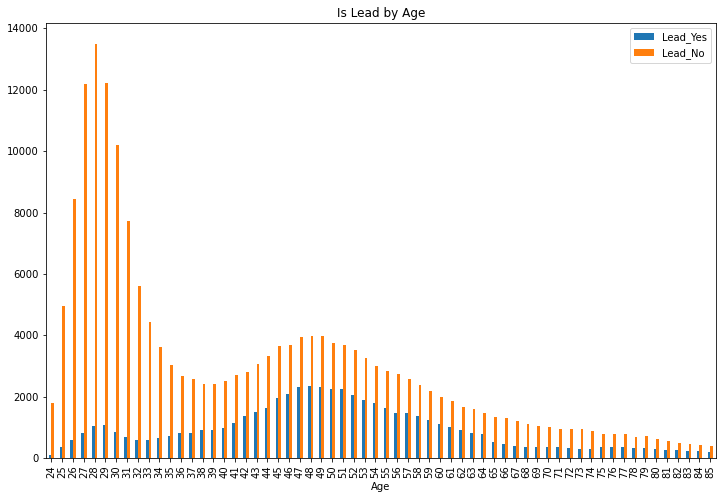

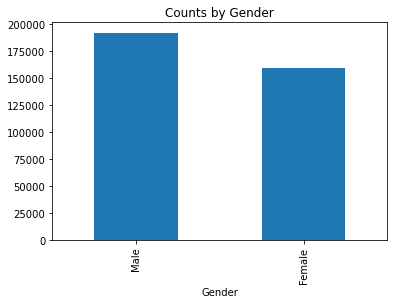

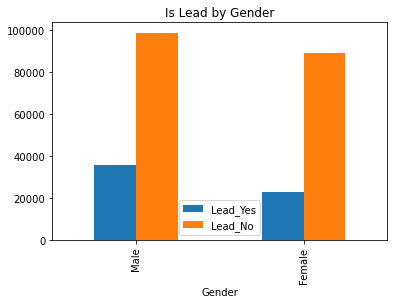

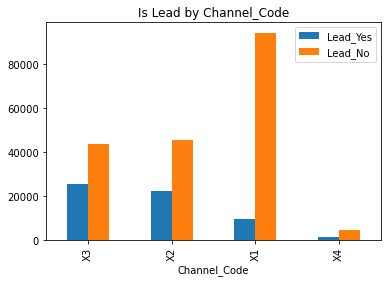

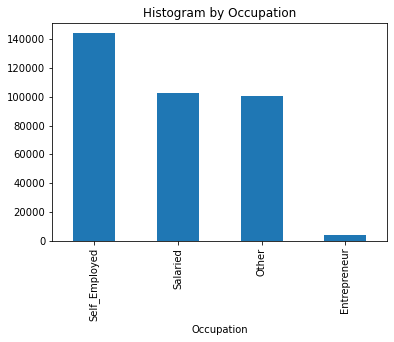

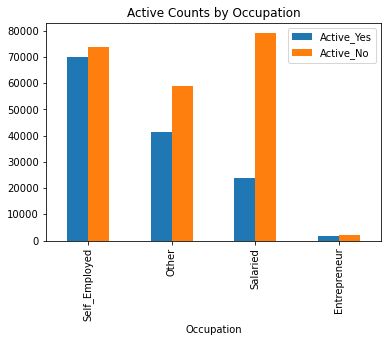

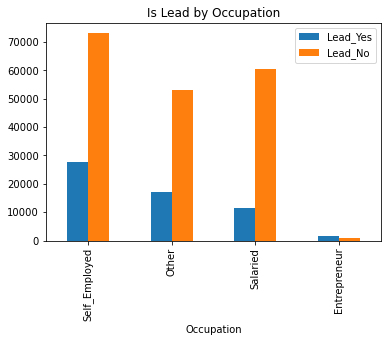

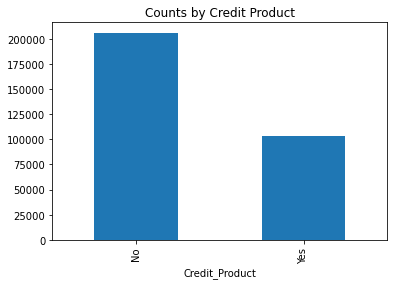

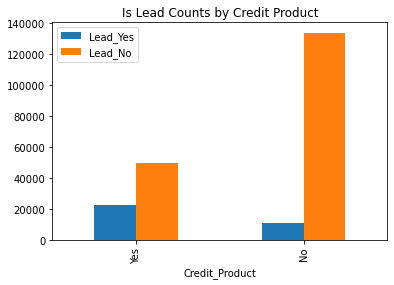

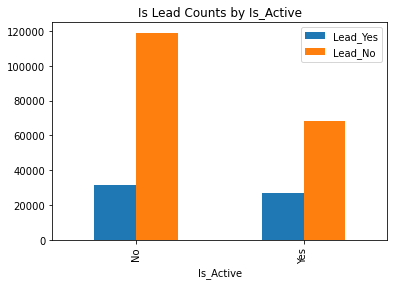

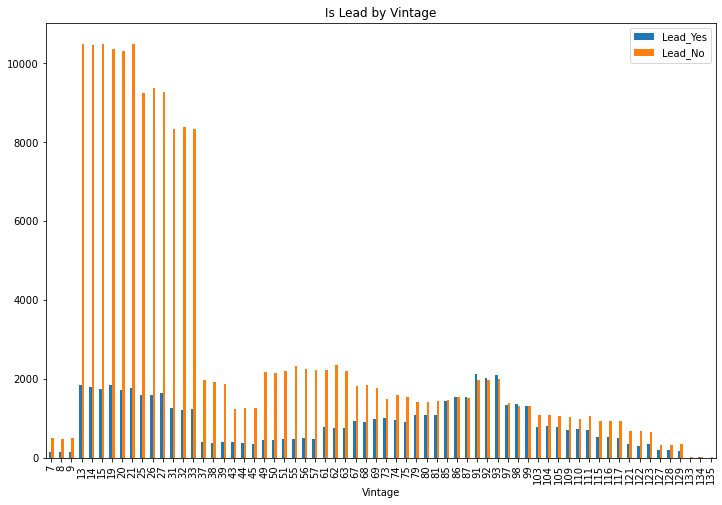

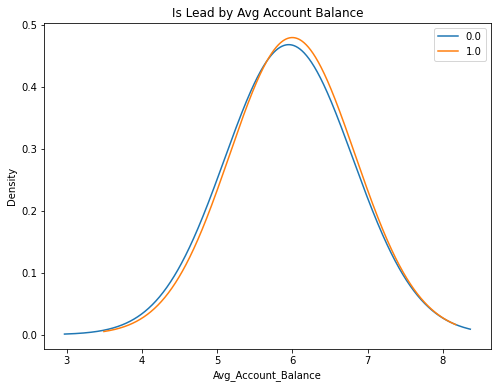

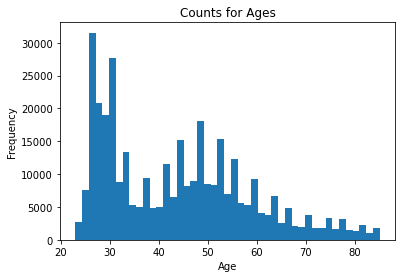

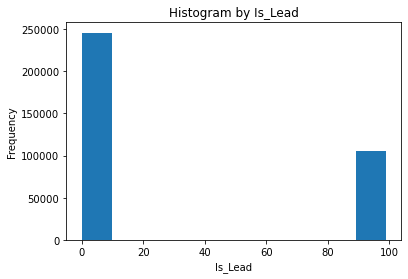

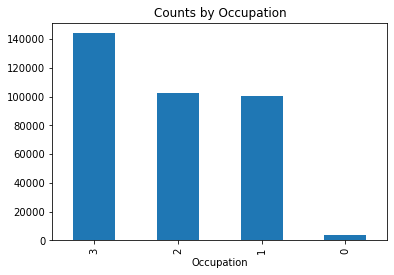

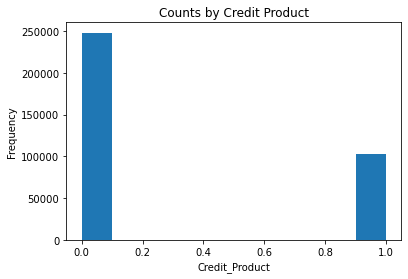

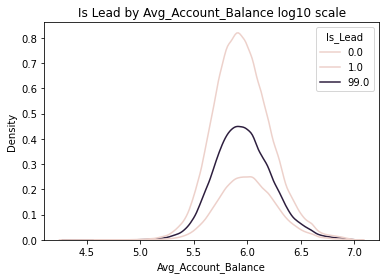

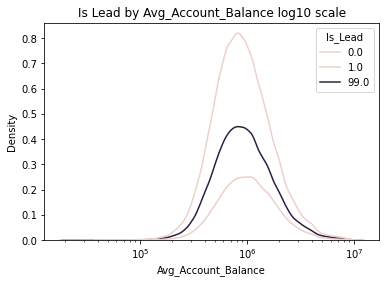

In [2]:
from ipynb.fs.full.Credit_Card_Lead_Prediction_Data_Import_Prep_EDA import *

In [3]:
## alternate way to import code from other jupyter notebook

##import Credit_Card_Lead_Prediction_Data_Processing_EDA as first

### Data Balancing / Resampling

In [4]:
train_new[train_new.Is_Lead == 1.0]['Is_Lead'].value_counts() , train_new[train_new.Is_Lead == 0.0]['Is_Lead'].value_counts()

(1.0    58288
 Name: Is_Lead, dtype: int64,
 0.0    187437
 Name: Is_Lead, dtype: int64)

#### It appears that records with "Is_Lead = 1" have much lesser samples as compared to records with "Is_Lead = 0". So, we need to rebalance the datasets before performing train / validations. Otherwise, using the train dataset 'as is' results in biased results, where "Is_Lead = 1" predictions have much lower precision / recall / accuracy as compared to "Is_Lead = 0" records

In [5]:
minor_df = train_new[train_new.Is_Lead == 1.0]
major_df = train_new[train_new.Is_Lead == 0.0]

In [6]:
temp_maj = resample(major_df, replace = True, n_samples = len(minor_df), random_state=1)

re_train_new = pd.concat([temp_maj, minor_df])
re_train_new.reset_index(inplace=True)
len(re_train_new)

116576

### Prepare input variables / target variables

In [7]:
X_new = re_train_new.iloc[:, : -1]
y_new = re_train_new.iloc[:, -1:]

X_new.drop(columns=['index'], inplace=True)

In [8]:
#X_new = train_new.iloc[:, : -1]
#y_new = train_new.iloc[:, -1:]

In [9]:
X_new.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,85,33,1,2,98,1,482664,0.0
1,0,57,33,3,2,117,0,1527186,1.0
2,1,30,19,2,0,31,0,551559,0.0
3,1,32,8,2,0,27,0,572501,0.0
4,1,28,9,2,0,33,0,428944,0.0


In [10]:
y_new.head()

,Is_Lead
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Train Test split

#### https://stackoverflow.com/questions/39856729/stratify-parameter-from-sklearns-train-test-split-not-working-correctly

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y_new, 
                                                    test_size = 0.3, 
                                                    stratify = y_new, 
                                                    random_state = 1)

### Standard Scaler - Data Standardization / Normalization

#### https://stackoverflow.com/questions/63037248/is-it-correct-to-use-a-single-standardscaler-before-splitting-data

In [12]:
## creating label encoder instance
sc = StandardScaler()

## list of numerical features columns, identified in the describe() function earlier
## we will standardize the data in these columns

num_cols = ['Age', 'Vintage', 'Avg_Account_Balance']

In [13]:
## fit / transform standard scaler to train / validation datasets
## Data normalization should be performed only after train / test datasets have been created for independent functioning

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols]  = sc.fit_transform(X_test[num_cols])
X_new[num_cols]   = sc.fit_transform(X_new[num_cols])

##y_train = sc.fit_transform(y_train)
##y_test  = sc.fit_transform(y_test)

In [14]:
len(X_train), len(X_test)

(81603, 34973)

## Machine Learning Models

In [15]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

## neural networks
from tensorflow import keras
from tensorflow.keras import layers

## model metrics evaluation
#from sklearn.metrics import *
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

### Neural Network

In [16]:
model_nn = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model_nn.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
history_nn = model_nn.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(X_test, y_test))

model_nn.summary()

Epoch 1/50
80/80 [==============================] - 1s 12ms/step - loss: 0.7547 - accuracy: 0.6016 - val_loss: 0.6472 - val_accuracy: 0.6417
Epoch 2/50
80/80 [==============================] - 1s 11ms/step - loss: 0.6424 - accuracy: 0.6509 - val_loss: 0.6585 - val_accuracy: 0.5929
Epoch 3/50
80/80 [==============================] - 1s 11ms/step - loss: 0.6173 - accuracy: 0.6671 - val_loss: 0.6037 - val_accuracy: 0.6804
Epoch 4/50
80/80 [==============================] - 1s 11ms/step - loss: 0.6051 - accuracy: 0.6786 - val_loss: 0.6144 - val_accuracy: 0.6740
Epoch 5/50
80/80 [==============================] - 1s 11ms/step - loss: 0.5975 - accuracy: 0.6862 - val_loss: 0.5955 - val_accuracy: 0.6930
Epoch 6/50
80/80 [==============================] - 1s 10ms/step - loss: 0.5917 - accuracy: 0.6935 - val_loss: 0.6162 - val_accuracy: 0.6747
Epoch 7/50
80/80 [==============================] - 1s 11ms/step - loss: 0.5868 - accuracy: 0.6977 - val_loss: 0.5823 - val_accuracy: 0.7050
Epoch 8/50
80

In [19]:
history_dict = history_nn.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

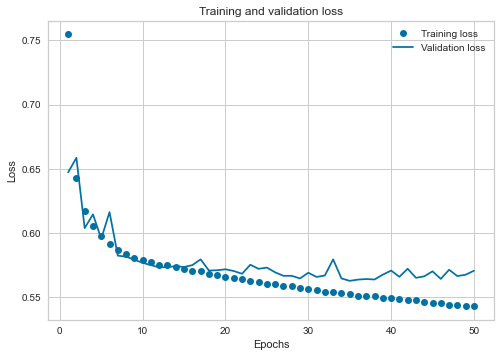

In [20]:
import matplotlib.pyplot as plt
history_dict = history_nn.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

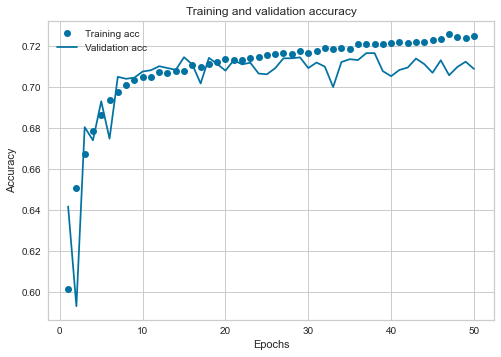

In [21]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
# This method evaluates the model and calculates the scores of train and test account data

def model_evaluation(X_data, y_data, models, cv):
    
    # Create dictonary to store the results
    train_model_dict = dict()
    test_model_dict = dict()
    time_model_dict = dict()
    
    for model in models:
        
        current_model_name = model.__class__.__name__
        
        # Cross validate the model with multi-folds (cv) for all data and Churn feature 
        
        cv_results = cross_validate(model, X_data, y_data, cv=cv,
                                    return_train_score=True, scoring='accuracy')
        
        train_model_dict[current_model_name] = cv_results['train_score'].mean()
        test_model_dict[current_model_name] = cv_results['test_score'].mean()
        time_model_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_model_dict, test_model_dict, time_model_dict

In [23]:
classes = ['Is_Not_Lead', 'Is_Lead']

# Create Logistic Regression Model object
Log_Reg = LogisticRegression(penalty='l1', solver='liblinear')

# Create RandomForestClassifier Model object
Random_Forest = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=11, random_state=1)

# Create Gaussian Naive Bayes Model object
Gauss_Naive_Bayes = GaussianNB()

# Create Gradient Boost Model object
Grad_Boost = GradientBoostingClassifier()

# Create AdaBoost Model object
Ada_Boost = AdaBoostClassifier()

# Create xgb Model object
XG_Boost = xgb.XGBClassifier()
##XG_Boost = xgb.XGBClassifier(num_class = 2, objective='multi:softprob', eval_metric='aucpr')

In [24]:
# Provides train/test indices to split data in train/test sets.
# This cross-validation object is a variation of KFold that returns
# Stratified folds. The folds are made by preserving the percentage of
# Samples for each class.

cv = StratifiedKFold(11, shuffle=True, random_state=1)

# Create array of models 
## models = [Log_Reg, Random_Forest, Gauss_Naive_Bayes, Grad_Boost, Ada_Boost, XG_Boost]
models = [Log_Reg, Random_Forest, Grad_Boost, XG_Boost]


# here we will copy the data_model_X and data_model_y variables to X and y, created during Milestone 3

##X = X_train
##y = y_train

X = X_new
y = y_new


print(X.shape)
print(y.shape)

(116576, 9)
(116576, 1)


In [25]:
# Perform model evaluations

train_dict, test_dict, time_dict = model_evaluation(X, y, models, cv)

[18:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [26]:
## display Train accuracy dictionary

train_dict

{'LogisticRegression': 0.6590395961522432,
 'RandomForestClassifier': 0.7417573083944273,
 'GradientBoostingClassifier': 0.7158360208707059,
 'XGBClassifier': 0.7460969668197808}

In [27]:
# Training accuracy

for key, value in train_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 65.9%
RandomForestClassifier - 74.2%
GradientBoostingClassifier - 71.6%
XGBClassifier - 74.6%


In [28]:
## display Test accuracy dictionary

test_dict

{'LogisticRegression': 0.6589520838652189,
 'RandomForestClassifier': 0.7202254165854817,
 'GradientBoostingClassifier': 0.7146753945001598,
 'XGBClassifier': 0.7171973265367385}

In [29]:
# Test accuracy

for key, value in test_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 65.9%
RandomForestClassifier - 72.0%
GradientBoostingClassifier - 71.5%
XGBClassifier - 71.7%


In [30]:
# Create training and test set

feature_train , feature_test, target_train, target_test = train_test_split(X, y, random_state = 1)

In [31]:
# This method plots the confusion matrix for given model

def plotConfMatrix(model , string ): 
    
    # Use fit to crete predicted target for feature_train and target_train and feature_test
    target_predicted = model.fit(feature_train, target_train).predict(feature_test)
    
    # Create confusion matrix for target test data and target predicted data
    matrix = confusion_matrix(target_test, target_predicted)
    
    # Create data frame with matrix for Churned and No-Churn Customer
    dataframe = pd.DataFrame(matrix, index = ['Is_Not_Lead', 'Is_Lead'] , columns = ['Is_Not_Lead', 'Is_Lead'])

    # Plot a heatmap with above dataframe
    sns.heatmap( dataframe , annot=True , fmt = '.5g', cbar = None , cmap = "Reds")
    plt.title("Confusion Matrix for "+ string) 
    plt.tight_layout()
    plt.xlabel("Predicted Class" )
    plt.ylabel("True Class" )
    plt.show()

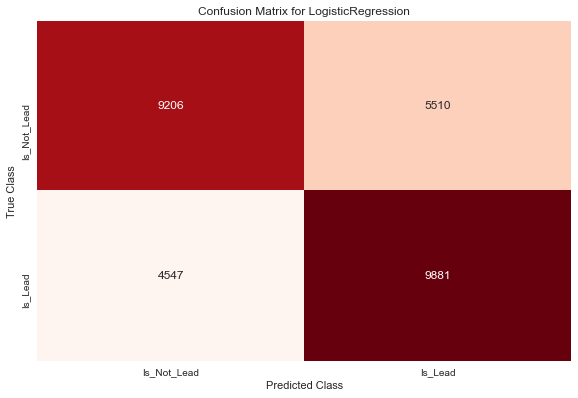

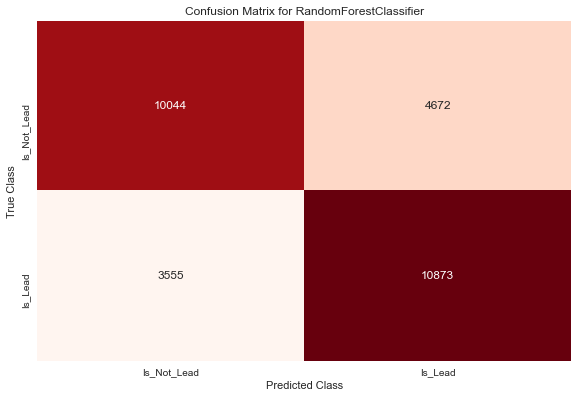

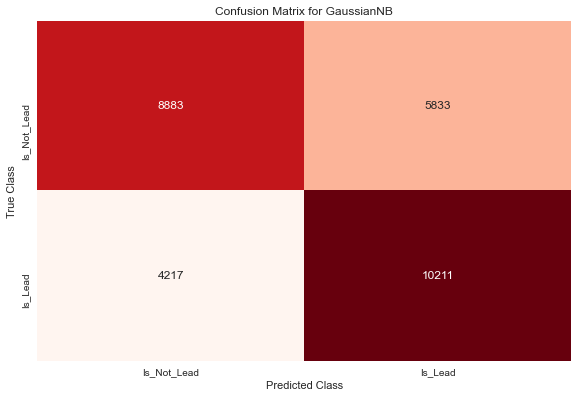

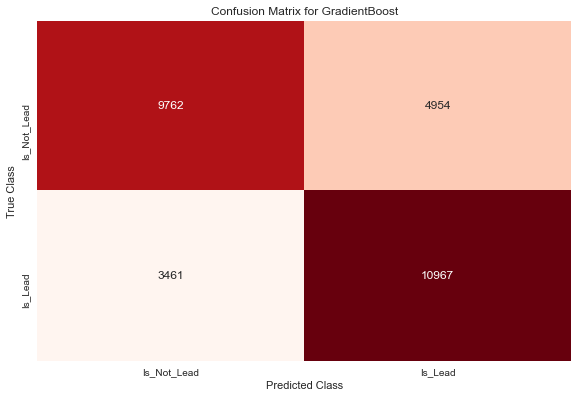

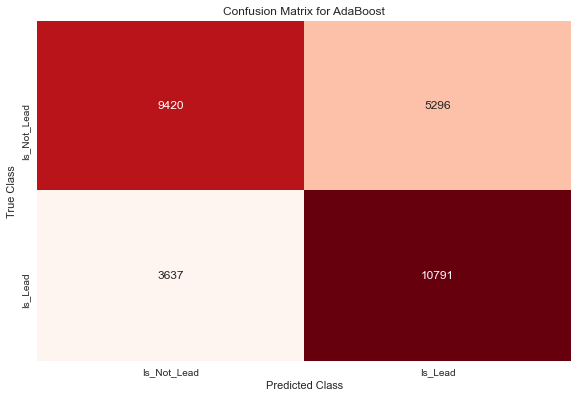

[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


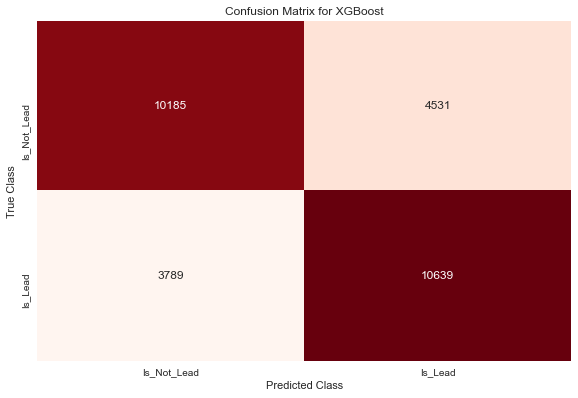

In [32]:
# Plot Confusion Matrix

#Log_Reg, Random_Forest, Gauss_Naive_Bayes

plotConfMatrix(Log_Reg , "LogisticRegression")
plotConfMatrix(Random_Forest , "RandomForestClassifier")
plotConfMatrix(Gauss_Naive_Bayes , "GaussianNB")
plotConfMatrix(Grad_Boost , "GradientBoost")
plotConfMatrix(Ada_Boost , "AdaBoost")
plotConfMatrix(XG_Boost , "XGBoost")

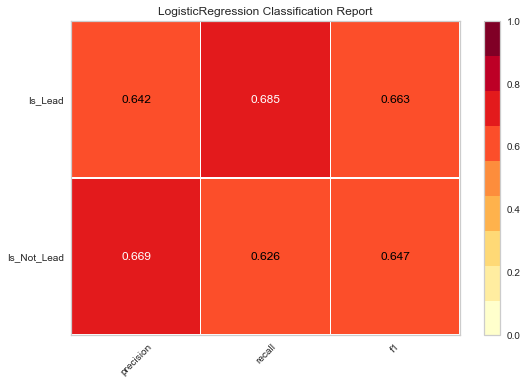

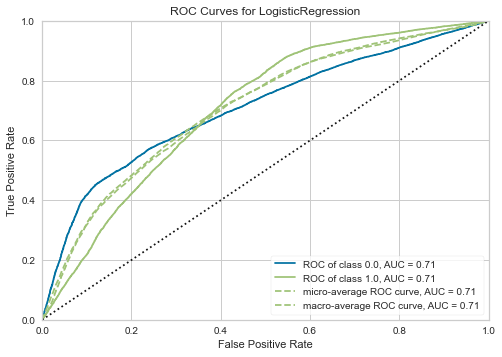

In [33]:
# Instantiate the visualizer for Logistic Regression

classes = ['Is_Not_Lead', 'Is_Lead']

visualizer_LR = ClassificationReport(Log_Reg, classes=classes)

visualizer_LR.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_LR.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_LR.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer_LR = ROCAUC(Log_Reg)

visualizer_LR.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_LR.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_LR.poof()

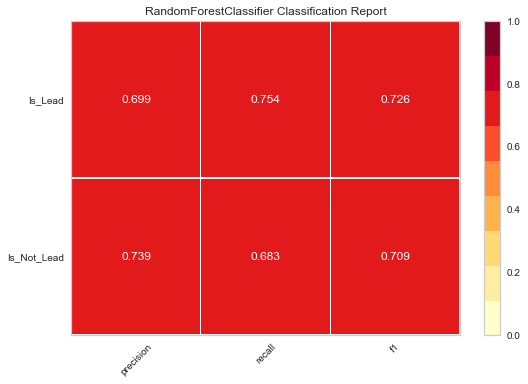

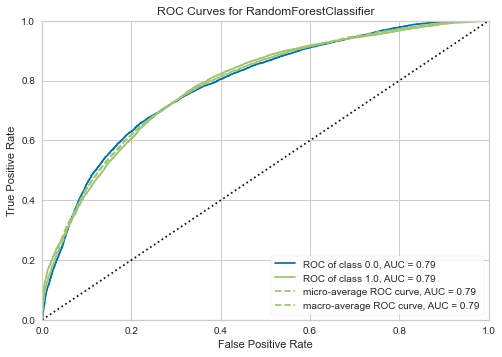

In [34]:
# Instantiate the visualizer for Random Forest model

visualizer_RF = ClassificationReport(Random_Forest, classes=classes)

visualizer_RF.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_RF.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_RF.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer_RF = ROCAUC(Random_Forest)

visualizer_RF.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_RF.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_RF.poof()

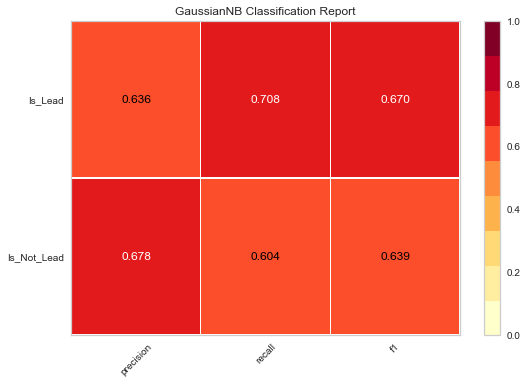

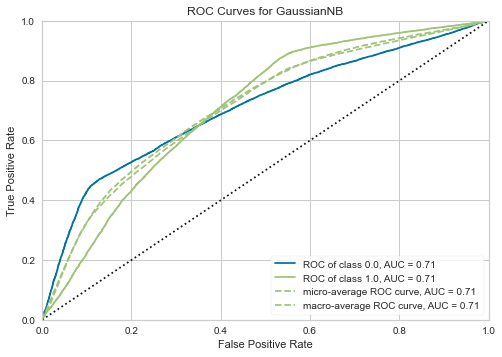

In [35]:
# Instantiate the visualizer for Naive Bayes model

visualizer_NB = ClassificationReport(Gauss_Naive_Bayes, classes=classes)

visualizer_NB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_NB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_NB.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer_NB = ROCAUC(Gauss_Naive_Bayes)

visualizer_NB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_NB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_NB.poof()

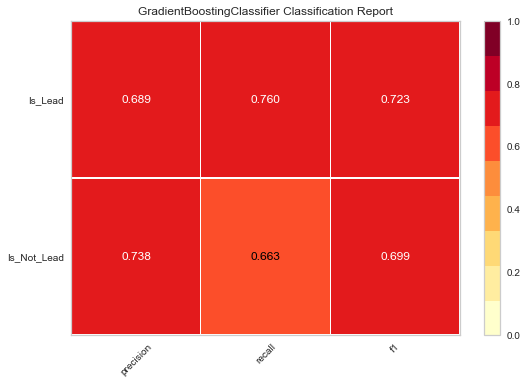

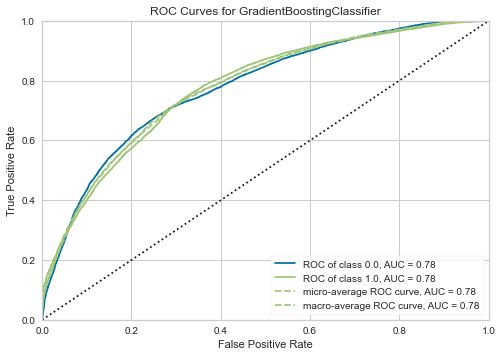

In [36]:
# Instantiate the visualizer for Gradient Boost model

visualizer_GB = ClassificationReport(Grad_Boost, classes=classes)

visualizer_GB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_GB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_GB.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer_GB = ROCAUC(Grad_Boost)

visualizer_GB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_GB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_GB.poof()

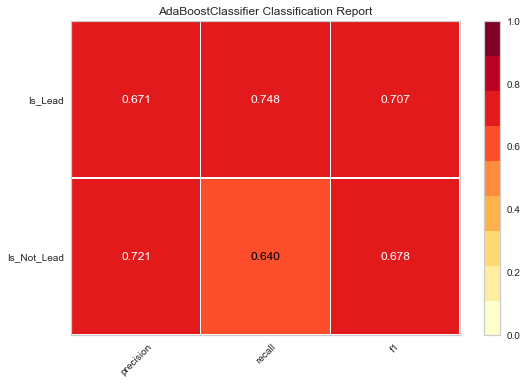

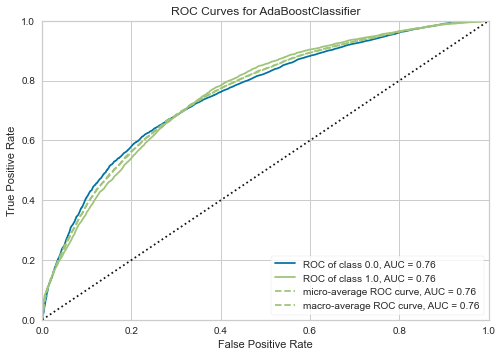

In [37]:
# Instantiate the visualizer for Ada Boost model

visualizer_AB = ClassificationReport(Ada_Boost, classes=classes)

visualizer_AB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_AB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_AB.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer_AB = ROCAUC(Ada_Boost)

visualizer_AB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_AB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_AB.poof()

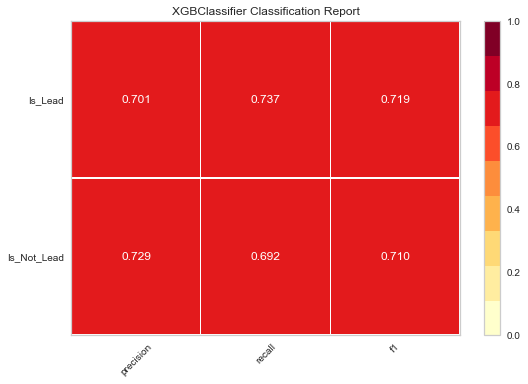

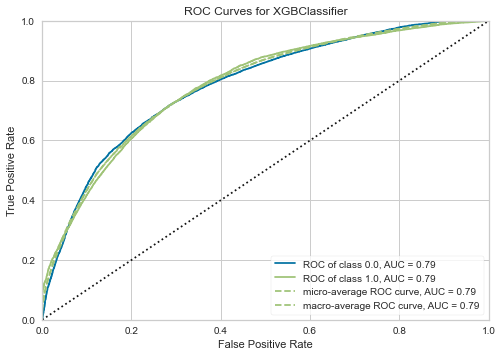

In [38]:
# Instantiate the visualizer for XG Boost model

visualizer_XB = ClassificationReport(XG_Boost, classes=classes)

visualizer_XB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_XB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_XB.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer_XB = ROCAUC(XG_Boost)

visualizer_XB.fit(feature_train, target_train)  # Fit the training data to the visualizer
visualizer_XB.score(feature_test, target_test)  # Evaluate the model on the test data
g = visualizer_XB.poof()

### =========================================================================================================================